In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
# Aqui criamos a base de dados lembrando que os dados devem ser do mesmo tamanho.
dataset = {"tempo":[1,3,4,4,6,8,10,10,11,13],
           "vendas":[91,110,106,116,119,129,139,143,138,159]
}

dataset = pd.DataFrame(dataset)
dataset.head()

,tempo,vendas
0,1,91
1,3,110
2,4,106
3,4,116
4,6,119


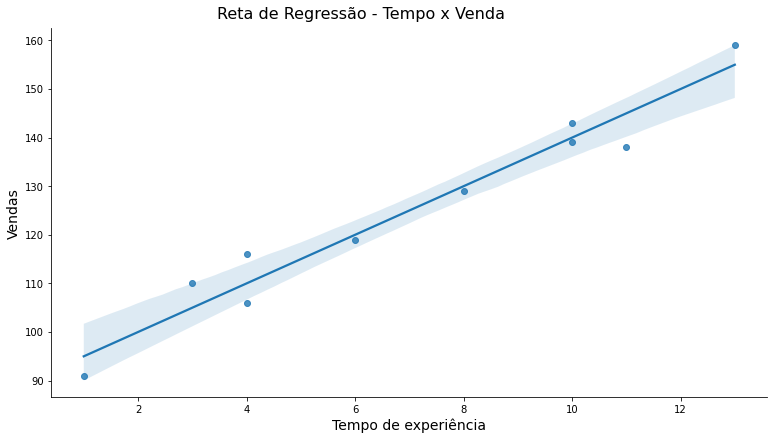

In [4]:
ax = sns.lmplot(x="tempo", y="vendas", data=dataset) # Passando os eixos
ax.fig.set_size_inches(12, 6) #tamanho
ax.fig.suptitle('Reta de Regressão - Tempo x Venda', fontsize=16, y=1.02) #subtitulo
ax.set_xlabels("Tempo de experiência", fontsize=14) # Titulo e tamanho da fonte do eito x
ax.set_ylabels("Vendas", fontsize=14) # Titulo e tamanho da fonte do eito Y
ax;

# Os pontos são exatamente os valores que passamos.

In [5]:
# Verificar a relação entre vendas e o tempo de experiência.
dataset.corr()

,tempo,vendas
tempo,1.000000,0.976883
vendas,0.976883,1.000000


In [2]:
import statsmodels.api as sm # biblioteca estatistica.

In [7]:
Y = dataset.vendas
X = sm.add_constant(dataset.tempo) # plotamos essa função para quando printarmos o sumario mostrar o r quadrado e etc.

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [9]:
Y.head()

0     91
1    110
2    106
3    116
4    119
Name: vendas, dtype: int64

In [8]:
resultado_regressao = sm.OLS(Y,X).fit()

In [10]:
print (resultado_regressao.summary())
# R-squared: 0.954 mostra que o r quadrado está acima de 95%

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     167.1
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           1.22e-06
Time:                        00:49:33   Log-Likelihood:                -28.355
No. Observations:                  10   AIC:                             60.71
Df Residuals:                       8   BIC:                             61.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.0000      3.075     29.265      0.0

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#Resíduo

In [11]:
#O Y previsto é o estimador e ele vai pegar o resultado da regressão que é o fit o treino que fiz acima.
# Para prever o resultado da regressão.
dataset ['Y_previsto'] = resultado_regressao.predict()
dataset.head()

,tempo,vendas,Y_previsto
0,1,91,95.0
1,3,110,105.0
2,4,106,110.0
3,4,116,110.0
4,6,119,120.0


In [12]:
# Ver o quanto o modelo está errando, para ver o quanto a minha previsão está descolada da minha realidade.
dataset["residuo"] = dataset["Y_previsto"] - dataset ["vendas"]
dataset.head()

,tempo,vendas,Y_previsto,residuo
0,1,91,95.0,4.0
1,3,110,105.0,-5.0
2,4,106,110.0,4.0
3,4,116,110.0,-6.0
4,6,119,120.0,1.0


#Coeficiente de determinação